# Proyecto 04 - Informe Final de Carrera - Serie de Tiempo
DS-25 / Sergio Maximiliano Fernández García / Mayo 2021

## 1. Introducción

El presente proyecto es una continuación del "Proyecto 03 - Series de Tiempo" en el cual se busca profundizar y ajustar la resolución de dicho proyecto para ser presentado como informe final para la carrera de Ciencia de Datos. La consigna planteada por el instituto es la siguiente:

+ Profundiza y ajusta la resolución de tus proyectos. Agrega una fuente de datos, prueba un modelo nuevo o responde una pregunta nueva. Elabora un informe final que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

## 2. Objetivo

El objetivo del este proyecto es extender el analisis exploratorio de los datos referidos al flujo vehicular en la autopista Illia con comparación con otros accesos y explorar un modelo sencillo de redes neuronales recurrentes que sea aplicado al conjunto de datos que componen la serie de tiempo de la circulación vehicular.

## 3. Alcance

Como continuación del proyecto 03 se volverá a realizar un analisis exploratorio de los datos.

Luego, se realizará un estudio previo de un modelo de predicción del flujo vehicular en Au. Illia a través de redes neuronales recurrentes. Para eso, se indagarán 2 librerías conocidas para aplicar esta metodología: Keras y Tensorflow. Durante el procesamiento se decidirá sobre la utilización de estas librerías. Además, se revisará si es posible utilizar variables externas que afectan al comportamiento de la serie de tiempo.

Finalmente, se buscará predecir la evolución de la circulación vehicular en el último trimestre del 2019.

## 4. Desarrollo

## 4.1 Preparación del Dataset

Antes de cargar el dataset, se cargan las herramientas necesarias para el análisis de la información obtenida a través de la página web del Gobierno de lal Ciudad de Buenos Aires. Numpy se utilizará para trabajar con vectores, matrices y operaciones matemáticas relacionadas. Pandas se utilizará para manipular los datos en diferentes formatos a través de series o dataframes.

Posteriormente, se cargan los datos del paso de vehículos por las unidades de peaje de la empresa AUSA. Estos datos pertenecen al periodo 2017-2020.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

Los datos obtenidos corresponde a los años 2017, 2018 y 2019 y se descargan del siguiente link: https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa

In [2]:

data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.head()

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2019['fecha'].unique()

array(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
       '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
       '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
       '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
       '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
       '2019-01-29', '2019-01-30', '2019-01-31', '2019-01-02',
       '2019-02-02', '2019-03-02', '2019-04-02', '2019-05-02',
       '2019-06-02', '2019-07-02', '2019-08-02', '2019-09-02',
       '2019-10-02', '2019-11-02', '2019-12-02', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-01-03',
       '2019-02-03', '2019-03-03', '2019-04-03', '2019-

In [7]:
data_2018['fecha'].unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-03', '2018-03-04', '2018-

In [8]:
data_2017['fecha'].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
       '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
       '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
       '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
       '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
       '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
       '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
       '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
       '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
       '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
       '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
       '2017-02-26', '2017-02-27', '2017-02-28', '2017-03-01',
       '2017-03-02', '2017-03-03', '2017-03-04', '2017-

In [9]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [10]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [11]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [12]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas en común con la siguiente información:

**periodo**: año del daset.

**fecha**: año-mes-dia.

**hora_inicio**: hora de inicio de la cuenta de vehiculos (DROP).

**hora_fin**: hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora).

**dia**: dia de la semana.

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB).

**sentido**: Centro o Provincia.

**tipo_vehiculo**: Liviano o Pesado.

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos.

In [13]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [14]:
# Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [15]:
dataset.dtypes

fecha             object
hora_fin           int64
dia               object
sentido           object
tipo_vehiculo     object
cantidad_pasos     int64
dtype: object

In [16]:
dataset.isna().sum()

fecha             0
hora_fin          0
dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
dtype: int64

In [17]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [18]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [19]:
dataset.dtypes

dia                       object
sentido                   object
tipo_vehiculo             object
cantidad_pasos             int64
fecha             datetime64[ns]
dtype: object

In [20]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


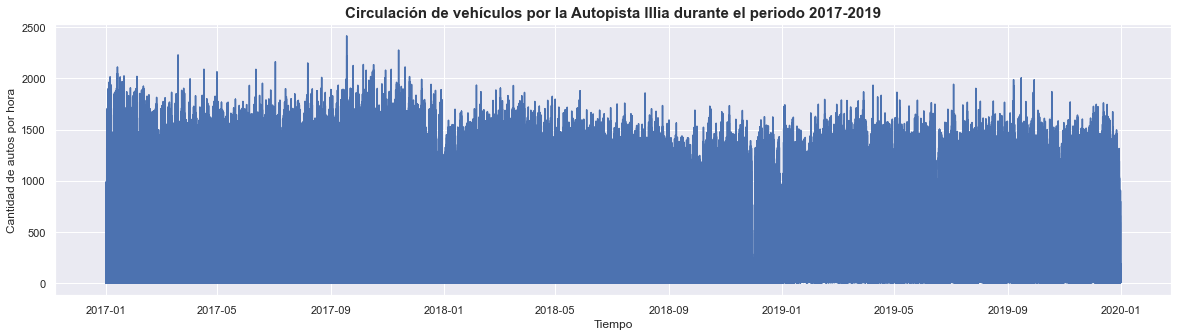

In [21]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (20,5))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por hora')
plt.title('Circulación de vehículos por la Autopista Illia durante el periodo 2017-2019', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

In [22]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


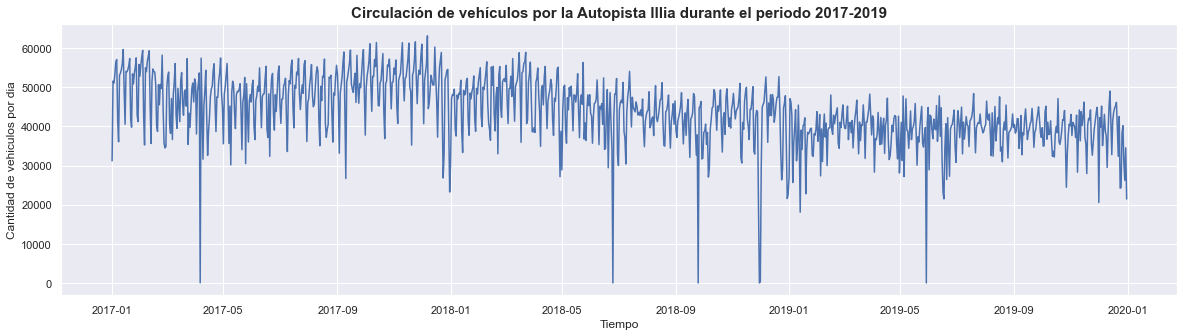

In [23]:
plt.figure(figsize = (20,5))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos por dia')
plt.title('Circulación de vehículos por la Autopista Illia durante el periodo 2017-2019', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

In [24]:
dataset['Horario'],dataset['solo_fecha']= dataset['fecha'].apply(lambda x:x.time()), dataset['fecha'].apply(lambda x:x.date())
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,Horario,solo_fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,00:00:00,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00,00:00:00,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00,00:00:00,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00,00:00:00,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00,00:00:00,2017-01-01
...,...,...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00,22:00:00,2019-12-31
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00,22:00:00,2019-12-31
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00,22:00:00,2019-12-31
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00,23:00:00,2019-12-31


Si se resamplean los datos por semana:

In [25]:
semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head()

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


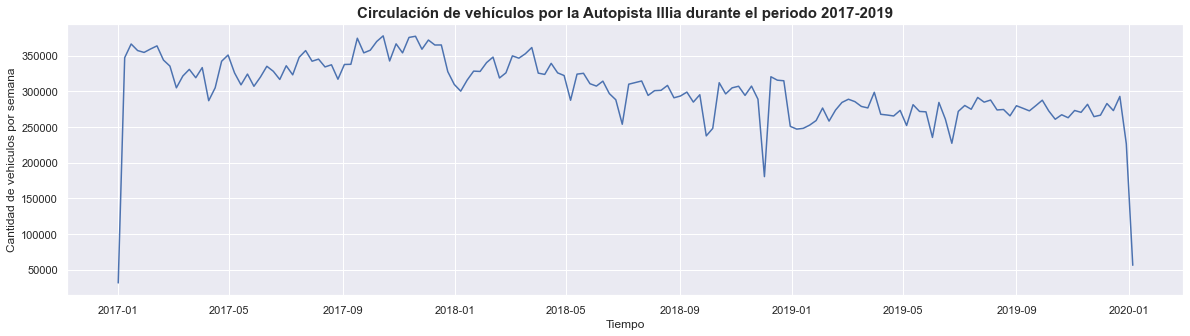

In [26]:
plt.figure(figsize = (20,5))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehiculos por semana')
plt.title('Circulación de vehículos por la Autopista Illia durante el periodo 2017-2019', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

Se guarda el dataset "diario" en formato csv.

In [27]:
diario.to_csv('dataset_flujovehicularIllia_diario.csv', sep=';')

## 4.2 Análisis Exploratorio de Datos

### 4.2.1 Búsqueda de Valores Faltantes

Para conocer mejor el dataset procesado a partir de los 3 datasets de flujo vehicular en los años 2017, 2018 y 2019, se realizará un estudio del contenido del dataset. Conociendo qué significa cada dato según lo analizado en instancias anteriores, se pretende investigar sobre la existencia de valores faltantes. Puede suceder que exista una fecha sin su valor de cantidad de pasos de vehículos, o vicerversa. También puede ocurrir que no estén ni la fecha ni la cantidad de pasos de vehículos, es decir, ninguno de los 2 datos.

In [28]:
diario.isna().sum()

cantidad_pasos    0
dtype: int64

En este primer análisis, no se observan valores faltantes de "cantidad_pasos". Por lo tanto, se tienen todos los datos de los vehículos que pasaron por el peaje de la Autopista Illia y que pagaron en efectivo.

In [29]:
diario["fecha"] = diario.index
diario['date_check'] = diario.fecha.diff()
diario.date_check.value_counts()

1 days    1094
Name: date_check, dtype: int64

In [30]:
diario

,cantidad_pasos,fecha,date_check
fecha,,,
2017-01-01,31183,2017-01-01,NaT
2017-01-02,51568,2017-01-02,1 days
2017-01-03,51093,2017-01-03,1 days
2017-01-04,53332,2017-01-04,1 days
2017-01-05,56486,2017-01-05,1 days
...,...,...,...
2019-12-27,40182,2019-12-27,1 days
2019-12-28,30681,2019-12-28,1 days
2019-12-29,26259,2019-12-29,1 days


Luego, revisando la diferencia temporal entre los valores de fecha se observa que se respeta la diferencia de 1 día. Esto significa que no hay fechas faltantes.

In [31]:
diario.drop(["fecha","date_check"], axis=1, inplace=True)

In [32]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


En conclusión, **no hay valores faltantes de fecha ni de cantidad de vehiculos que pasaron por la Autopista Illia**.

### 4.2.2 Análisis de Anomalías

El análisis de anomalías consiste en detectar valores atípicos dentro de la serie de tiempo. Para comenzar este estudio se observa el gráfico anterior en el cual se muestra la cantidad de autos que pasan por día. 

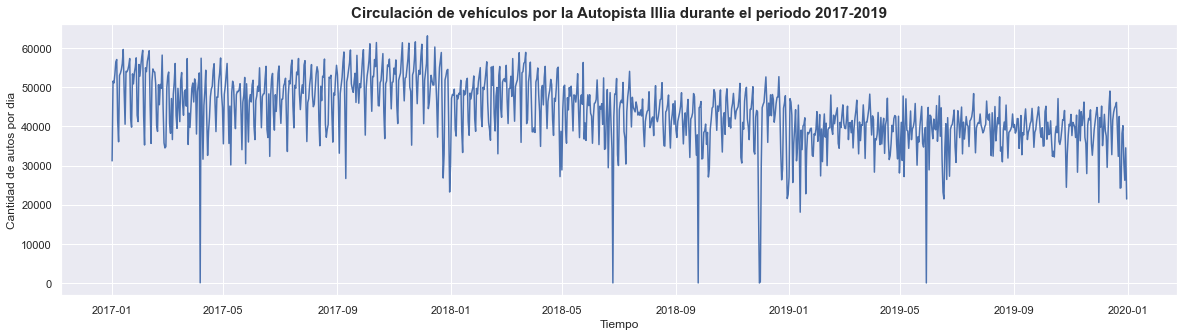

In [33]:
plt.figure(figsize = (20,5))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por dia')
plt.title('Circulación de vehículos por la Autopista Illia durante el periodo 2017-2019', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

**Se observa que existen eventos anómalos**. En general, se tratan de días en los cuales pasaron menos de 10000 vehículos o prácticamente la cantidad de vehículos fue nula. Estos días son los siguientes.

In [34]:
diario.cantidad_pasos[diario.cantidad_pasos<=10000]

fecha
2017-04-06     40
2018-06-25      0
2018-09-25      0
2018-11-30      0
2018-12-01    350
2019-05-29      0
Name: cantidad_pasos, dtype: int64

De esta manera, sabemos que el 06/04/2017 circularon apenas 40 vehículos por la autopista Illia. Mientras que durante el 2018 hubo 3 dias en donde no circularon vehículos y un día con apenas 350 pasos de vehículos. Durante el 2019 hubo un solo día sin paso de vehículos, el 29/05/2019. Para entender esto se investigan los sucesos durante estas fechas para entender mejor la situación.

En estas fecha ocurrieron eventos extraordinarios que no son habituales. EN general se trataron de eventos gremiales y encuentros internacionales que requieron el corte de accesos hacia la Ciudad de Buenos Aires.

*  2017-04-06: [Paro general de la CGT](https://www.pagina12.com.ar/30044-una-muestra-de-rechazo-al-ajuste-pro)
*  2018-06-25: [Paro general de la CGT](https://www.infobae.com/diarios/2018/06/25/clarin-lunes-25-de-junio-de-2018/)
*  2018-09-25: [Paro general de la CGT](https://www.clarin.com/viajes/paro-general-25-septiembre-operan-aeropuertos_0_0KqpCPX5B.html)
*  2018-11-30: [Comienzo G20 en Argentina](https://www.infobae.com/america/portadas/2018/11/30/clarin-argentina-viernes-30-de-noviembre-de-2018/)
*  2018-12-01: [Continúa G20 en Argentina](https://www.infobae.com/america/portadas/2018/12/01/clarin-argentina-sabado-1-de-diciembre-de-2018/)
*  2019-05-29: [Paro general de la CGT](https://www.perfil.com/noticias/politica/como-se-vive-paro-miercoles-29-de-mayo-en-las-redes-sociales.phtml)

Dado que estas anomalías pueden alterar los resultados de los modelos de predicción a futuro, **se decide eliminarlas para suavizar la serie de tiempo**. Para hacer esto se consideran los paso de vehículos menores a 10000 como valores NaN. Esto se trata más adelante.

### 4.2.3 Imputación de valores faltantes

In [35]:
diario.cantidad_pasos[diario.cantidad_pasos <= 10000] = np.nan
diario.isna().sum()

cantidad_pasos    6
dtype: int64

Se interpola la serie para imputar los valores faltantes surgidos a partir de la eliminación de los eventos anómalos.

In [36]:
print(diario.isna().sum())
diario = diario.interpolate()
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


Se vuelve a graficar la serie de tiempo para ver la nueva forma de los datos.

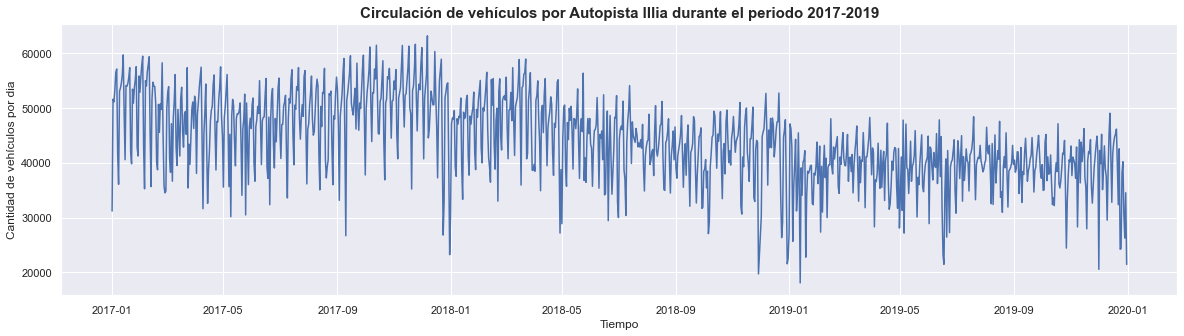

In [37]:
plt.figure(figsize = (20,5))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por dia')
plt.title('Circulación de vehículos por Autopista Illia durante el periodo 2017-2019', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

## 4.3 Modelo de Machine Learning

### 4.3.1 Métrica seleccionada para evaluar reasultados

La métrica que vamos a utilizar para evaluar los distintos modelos es la raíz del error cuadrático medio (RMSE). Se estudiará el caso de la aplicación de alguna métrica más de ser necesario, como puede ser el caso de MAPE (Error porcentual absoluto medio) que está definido por la fórmula: 

\begin{equation}
MAPE=\frac{100%}{n}\sum_{i=0}^n\frac{y_{i}-\hat{y}}{y_{i}}
\end{equation}

Esta métrica suele ser usada en series de tiempo para tener noción del error relativo entre el valor real y el predicho por algún modelo de regresión.

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### 4.3.2 División de los datos

Para comenzar, los datos se deben dividir en un conjunto de entrenamiento para entrenar el modelo de redes neuronales y un conjunto de testeo para estimar el error del modelo. 

Primero, se define cuántos valores hacia atrás se van a tomar para predecir el valor siguiente.

In [39]:
look_back = 90 # toma 90 dias anteriores al valor más reciente para predecir ese valor. Siempre se toman 90 dias anteriores para saber el valor del dia siguiente

N = diario.cantidad_pasos.shape[0] # es la cantidad de datos que hay en la serie de datos.
N

1095

Creamos los `X` e `y` con ceros para luego llenar con los datos.

In [40]:
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1004, 90) (1004,)


In [41]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
y

array([0., 0., 0., ..., 0., 0., 0.])

Llenamos los `X` e `y`

In [43]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = diario.cantidad_pasos.iloc[i:i+look_back]
    y[i] = diario.cantidad_pasos.iloc[i+look_back]

In [44]:
print(X)

[[31183. 51568. 51093. ... 51074. 46235. 52127.]
 [51568. 51093. 53332. ... 46235. 52127. 50995.]
 [51093. 53332. 56486. ... 52127. 50995. 38045.]
 ...
 [38348. 37170. 39669. ... 24349. 38168. 40182.]
 [37170. 39669. 34943. ... 38168. 40182. 30681.]
 [39669. 34943. 35054. ... 40182. 30681. 26259.]]


In [45]:
print(y)

[50995. 38045. 48833. ... 30681. 26259. 34523.]


Acá destacamos que los valores de tiempo, la fecha, ya no es parte de los datos. Sabemos que cada valor que se toma hacia atrás corresponde a un día anterior.

Hacemos el train/test split. Se elige un periodo de los 2 años y medio más antiguos de datos para utilizarlos con datos de entrenamiento (corresponde a 913 días). Luego, se usa medio año de los datos más recientes para testear. Por eso, los valores de testeo son los 182 días más recientes de la serie de tiempo.

In [46]:
N_train = 913 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 182 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test
print(f'N_total: {N_total}')

length_total = N_train + N_test + look_back
print(f'length_total: {length_total}')

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

N_total: 1005
length_total: 1095
(823, 90) (823,)
(181, 90) (181,)


In [47]:
N_train

823

In [48]:
X_train

array([[31183., 51568., 51093., ..., 51074., 46235., 52127.],
       [51568., 51093., 53332., ..., 46235., 52127., 50995.],
       [51093., 53332., 56486., ..., 52127., 50995., 38045.],
       ...,
       [42686., 41861., 28303., ..., 42227., 44179., 34754.],
       [41861., 28303., 36853., ..., 44179., 34754., 30793.],
       [28303., 36853., 36537., ..., 34754., 30793., 38705.]])

In [49]:
y_train

array([50995. , 38045. , 48833. , 50891. , 53655. , 55537. , 57419. ,
       44409. , 31615. , 45346. , 49017. , 54351. , 42650. , 32588. ,
       38688. , 42272. , 47573. , 49557. , 50244. , 54288. , 56002. ,
       45893. , 38668. , 47529. , 47420. , 51580. , 53686. , 57473. ,
       48393. , 44865. , 35547. , 48208. , 50211. , 53313. , 56077. ,
       46876. , 35643. , 45178. , 30152. , 48562. , 51543. , 50388. ,
       43826. , 39423. , 48099. , 48938. , 48873. , 49381. , 50899. ,
       44007. , 34043. , 46186. , 47902. , 52506. , 30479. , 50885. ,
       43087. , 36009. , 46552. , 48109. , 46234. , 50576. , 51795. ,
       40054. , 36617. , 46609. , 47788. , 50266. , 48962. , 54965. ,
       46901. , 39656. , 47622. , 48274. , 48349. , 52191. , 55347. ,
       39192. , 37147. , 48306. , 32336. , 48103. , 52155. , 53526. ,
       43183. , 39042. , 48073. , 43811. , 48559. , 53626. , 55433. ,
       45628. , 40770. , 46961. , 47005. , 50344. , 51034. , 52293. ,
       41944. , 3357

In [50]:
X_test

array([[36853., 36537., 37999., ..., 30793., 38705., 43996.],
       [36537., 37999., 43558., ..., 38705., 43996., 41613.],
       [37999., 43558., 38586., ..., 43996., 41613., 37124.],
       ...,
       [38348., 37170., 39669., ..., 24349., 38168., 40182.],
       [37170., 39669., 34943., ..., 38168., 40182., 30681.],
       [39669., 34943., 35054., ..., 40182., 30681., 26259.]])

In [51]:
y_test

array([41613., 37124., 40815., 44932., 32975., 41090., 36759., 39193.,
       42509., 40438., 40021., 34842., 41401., 41753., 42488., 44261.,
       48381., 39900., 33247., 39618., 40445., 40990., 40757., 43164.,
       40348., 39500., 38338., 38817., 39904., 40493., 46468., 42150.,
       41603., 43174., 38276., 32510., 43488., 32379., 38965., 45075.,
       36295., 39448., 42198., 40647., 47543., 33680., 34702., 30943.,
       39078., 41105., 39066., 45447., 38050., 31905., 38482., 38760.,
       39207., 39986., 43164., 39703., 40473., 38274., 38869., 41994.,
       41954., 34380., 38023., 42777., 32750., 38391., 37842., 41912.,
       44463., 40606., 36628., 38539., 39293., 40707., 41326., 44596.,
       40820., 34646., 38523., 39191., 41486., 43110., 44985., 41925.,
       38348., 37170., 39669., 34943., 35054., 43775., 45150., 36722.,
       41064., 37894., 38100., 41414., 36383., 32359., 33626., 32168.,
       37928., 39997., 38379., 47105., 36187., 35383., 36687., 38960.,
      

In [52]:
y_train.shape

(823,)

Se representan los datos de Train y Test para ser más gráfico.

Observations: 1095
Training Observations: 913
Testing Observations: 182


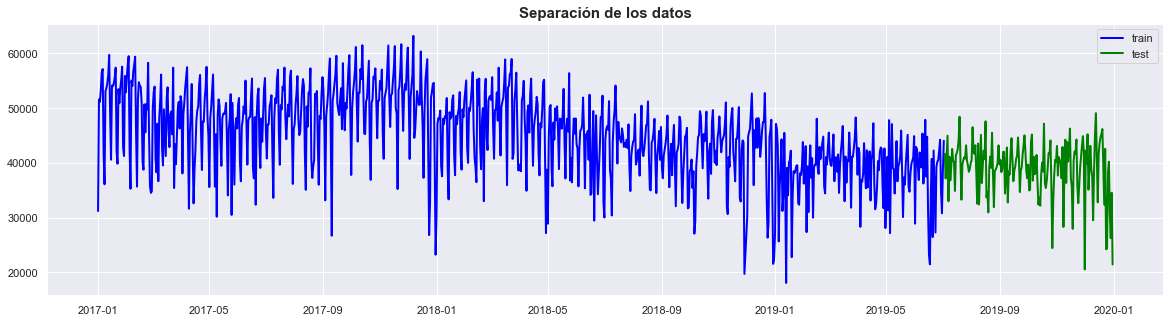

In [53]:
plt.figure(figsize = (20,5))


train_size = int(len(diario.cantidad_pasos) -182)
train, test = pd.DataFrame(diario.cantidad_pasos[0:train_size]), pd.DataFrame(diario.cantidad_pasos[train_size:len(diario.cantidad_pasos)])
print('Observations: %d' % (len(diario.cantidad_pasos)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

plt.plot(train.index, train.cantidad_pasos,
         color='blue', lw=2, label="train")
plt.plot(test.index, test.cantidad_pasos,
         color='green', lw=2, label="test")
plt.legend()
plt.title("Separación de los datos", fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

### 4.3.3 Modelo Benchmark

Para definir el modelo Bechmark con el cual se compararán los resultados de los modelos más complejos de ML se parte de considerar que los valores futuros de la serie de tiempo se comportaran de igual manera que los valores del pasado. Por ende, se copia el valor de la fecha anterior. Hay que aclarar que se está prediciendo un valor a la vez (One Step Prediction).

Finalmente, se define el **modelo Benchmark** si se predicen los valores futuros copiando el valor de la fecha anterior.

In [54]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 2]
print(y_test_pred_benchmark.shape)
y_test_pred_benchmark

(181,)


array([43996., 41613., 37124., 40815., 44932., 32975., 41090., 36759.,
       39193., 42509., 40438., 40021., 34842., 41401., 41753., 42488.,
       44261., 48381., 39900., 33247., 39618., 40445., 40990., 40757.,
       43164., 40348., 39500., 38338., 38817., 39904., 40493., 46468.,
       42150., 41603., 43174., 38276., 32510., 43488., 32379., 38965.,
       45075., 36295., 39448., 42198., 40647., 47543., 33680., 34702.,
       30943., 39078., 41105., 39066., 45447., 38050., 31905., 38482.,
       38760., 39207., 39986., 43164., 39703., 40473., 38274., 38869.,
       41994., 41954., 34380., 38023., 42777., 32750., 38391., 37842.,
       41912., 44463., 40606., 36628., 38539., 39293., 40707., 41326.,
       44596., 40820., 34646., 38523., 39191., 41486., 43110., 44985.,
       41925., 38348., 37170., 39669., 34943., 35054., 43775., 45150.,
       36722., 41064., 37894., 38100., 41414., 36383., 32359., 33626.,
       32168., 37928., 39997., 38379., 47105., 36187., 35383., 36687.,
      

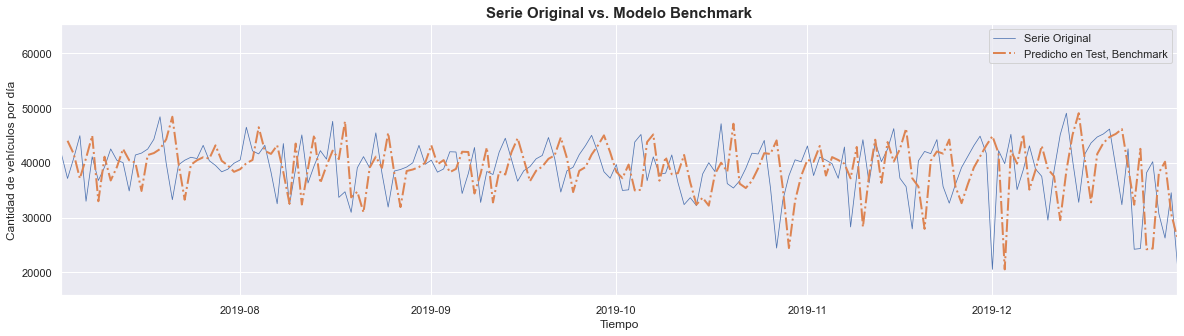

In [55]:
plt.figure(figsize = (20,5))

plt.plot(diario.cantidad_pasos.index[:length_total], diario.cantidad_pasos[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.cantidad_pasos.index[N_train+look_back+1: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.cantidad_pasos.index[N_train+look_back], diario.cantidad_pasos.index[length_total-1])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por día')
plt.title("Serie Original vs. Modelo Benchmark", fontsize=15, fontweight='bold', fontstretch='normal')
plt.legend()
plt.show()

In [56]:
rmse_test_benchmark =  np.sqrt(mean_squared_error(y_test, y_test_pred_benchmark))
print(f'RMSE EN TEST, MODELO BENCHMARK: {round(rmse_test_benchmark,2)}')

RMSE EN TEST, MODELO BENCHMARK: 5907.95


In [57]:
MAPE_test_benchmark = mean_absolute_percentage_error(y_test, y_test_pred_benchmark)*100
print(f'MAPE EN TEST, MODELO BENCHMARK: {round(MAPE_test_benchmark,2)} %')

MAPE EN TEST, MODELO BENCHMARK: 12.27 %


Con este modelo se van a comparar el resto de los modelos que se platearán a continuación, enfocándose en el error que genera cada unos de ellos.

### 4.3.4 Normalización de los datos

Para comenzar a implementar un modelo de predicción del tráfico de vehículos por la autopista Illia con pago en efectivo para el último trimestre del 2019 se tiene que considerar el dataset resultante del análisis EDA hecho previamente. 

Además, para aplicar redes neuronales los datos deben ser escalados o normalizados para que trabajen con valores entre 0 y 1, dado que la función de activación de las redes neuronales trabaja en este rango. Por lo tanto, se elimina la dependencia del orden de magnitud y de la unidad de medida si se tratase de más de un atributo.

Para normalizar, deben calcularse la media y la desviación estándar utilizando los datos de entrenamiento para que los modelos no tengan acceso a los valores en los conjuntos de prueba.

In [58]:
X_train_mean = X_train.mean()
X_train_mean

45022.30546780073

In [101]:
X_train_std = X_train.std()
X_train_std

7480.267655580397

Finalmente, se aplica el método Z-score para normalizar los datos usando media y desviación estándar.

In [60]:
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_train_scaled

array([[-1.85010833,  0.87506154,  0.81156114, ...,  0.80902112,
         0.16211914,  0.94979149],
       [ 0.87506154,  0.81156114,  1.11088198, ...,  0.16211914,
         0.94979149,  0.79846   ],
       [ 0.81156114,  1.11088198,  1.53252464, ...,  0.94979149,
         0.79846   , -0.93276147],
       ...,
       [-0.31232913, -0.4226193 , -2.23512129, ..., -0.37369057,
        -0.11273734, -1.37271899],
       [-0.4226193 , -2.23512129, -1.09211406, ..., -0.11273734,
        -1.37271899, -1.9022455 ],
       [-2.23512129, -1.09211406, -1.13435854, ..., -1.37271899,
        -1.9022455 , -0.84452933]])

In [103]:
X_train_scaled.min()

-3.6023183539025325

Representando la distribución en los datos normalizados se obtiene lo siguiente:

C:\Users\SMFernandez\.conda\envs\timeseries\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


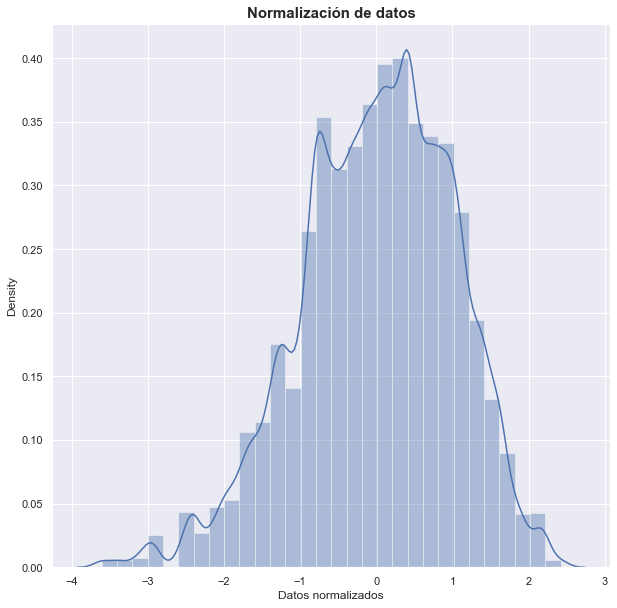

In [62]:
plt.figure(figsize = (10,10))
sns.distplot(X_train_scaled, bins = 30)
plt.xlabel('Datos normalizados')
plt.title('Normalización de datos', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

Otra manera de normalizar los datos es utilizando como referencia el valor máximo y mínimo del dataset. Este método se llama Min-Max Normalization. En la librería de Scikit-learn se puede utilizar la función MinMaxScaler que utiliza el mismo procedimiento de normalización. Sin embargo, se prefiere utilizar la fórmula planteada a continuación para resaltar que siempre se utilizarán los valores máximos y mínimos de del set de datos de entrenamiento para escalar los datos de entrenamiento y de testeo.

In [105]:
X_train_scaled2 =(X_train - X_train.min()) / (X_train.max() - X_train.min())
X_train_scaled2

array([[0.29093694, 0.74342412, 0.73288051, ..., 0.73245877, 0.62504717,
        0.75583228],
       [0.74342412, 0.73288051, 0.78257974, ..., 0.62504717, 0.75583228,
        0.7307052 ],
       [0.73288051, 0.78257974, 0.85258929, ..., 0.75583228, 0.7307052 ,
        0.4432532 ],
       ...,
       [0.54626978, 0.5279572 , 0.22700939, ..., 0.53608133, 0.57941   ,
        0.37020266],
       [0.5279572 , 0.22700939, 0.4167943 , ..., 0.57941   , 0.37020266,
        0.28228008],
       [0.22700939, 0.4167943 , 0.40978003, ..., 0.37020266, 0.28228008,
        0.45790327]])

Si se visualiza la distribución de los datos se obtiene lo siguiente.

C:\Users\SMFernandez\.conda\envs\timeseries\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


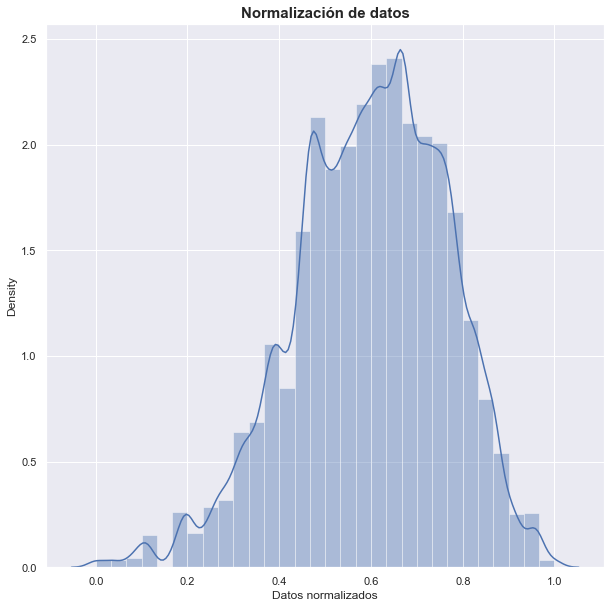

In [107]:
plt.figure(figsize = (10,10))
sns.distplot(X_train_scaled2, bins = 30)
plt.xlabel('Datos normalizados')
plt.title('Normalización de datos', fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

Se observa que los datos se encuentran normalizados entre 0 y 1. Esto es útil para ingresar los datos en redes neuronales recurrentes. Por lo tanto, se normalizan todas las divisiones de datos de entrenamiento y testeo.

In [65]:
y_train_scaled2 = (y_train - X_train.min()) / (X_train.max() - X_train.min())
y_train_scaled2

array([0.7307052 , 0.4432532 , 0.68271515, 0.72839671, 0.7897494 ,
       0.83152427, 0.87329915, 0.58451533, 0.30052607, 0.60531398,
       0.68679941, 0.80519855, 0.54547069, 0.32212382, 0.45752592,
       0.5370802 , 0.65474684, 0.69878582, 0.7140352 , 0.80380014,
       0.84184591, 0.61745577, 0.45708197, 0.65377017, 0.65135069,
       0.74369048, 0.7904375 , 0.87449779, 0.67294844, 0.59463719,
       0.38780493, 0.66884198, 0.7133027 , 0.782158  , 0.84351069,
       0.63927549, 0.38993585, 0.60158487, 0.26805176, 0.67669974,
       0.74286919, 0.71723158, 0.57157444, 0.47384076, 0.6664225 ,
       0.68504584, 0.68360303, 0.69487914, 0.72857428, 0.57559211,
       0.35442055, 0.62395951, 0.66204968, 0.76424497, 0.2753102 ,
       0.72826352, 0.55517081, 0.39805998, 0.63208364, 0.66664447,
       0.62502497, 0.72140463, 0.74846285, 0.48784711, 0.41155579,
       0.63334887, 0.65951921, 0.71452354, 0.68557857, 0.81882755,
       0.63983041, 0.47901267, 0.6558345 , 0.67030699, 0.67197

In [66]:
X_test_scaled2 =(X_test - X_train.min()) / (X_train.max() - X_train.min())
X_test_scaled2

array([[0.4167943 , 0.40978003, 0.44223214, ..., 0.28228008, 0.45790327,
        0.57534794],
       [0.40978003, 0.44223214, 0.56562562, ..., 0.45790327, 0.57534794,
        0.52245233],
       [0.44223214, 0.56562562, 0.45526181, ..., 0.57534794, 0.52245233,
        0.4228097 ],
       ...,
       [0.44997891, 0.42383077, 0.47930124, ..., 0.13924219, 0.44598344,
        0.49068833],
       [0.42383077, 0.47930124, 0.3743979 , ..., 0.44598344, 0.49068833,
        0.27979401],
       [0.47930124, 0.3743979 , 0.37686178, ..., 0.49068833, 0.27979401,
        0.18163859]])

In [67]:
y_test_scaled2 = (y_test - X_train.min()) / (X_train.max() - X_train.min())
y_test_scaled2

array([0.52245233, 0.4228097 , 0.50473907, 0.59612439, 0.33071408,
       0.51084327, 0.41470778, 0.46873543, 0.5423409 , 0.49637078,
       0.4871146 , 0.372156  , 0.51774655, 0.52555992, 0.54187476,
       0.58123016, 0.67268207, 0.48442876, 0.33675168, 0.47816919,
       0.49652616, 0.50862356, 0.50345164, 0.55687998, 0.49437304,
       0.47554993, 0.44975694, 0.46038934, 0.48451755, 0.49759162,
       0.63021909, 0.53437216, 0.52223036, 0.55710195, 0.44838072,
       0.32039244, 0.56407183, 0.31748463, 0.4636745 , 0.59929857,
       0.40440834, 0.47439568, 0.53543762, 0.50100997, 0.65408093,
       0.34636301, 0.36904841, 0.28560964, 0.46618277, 0.51117622,
       0.46591641, 0.60755588, 0.44336419, 0.30696322, 0.45295332,
       0.4591241 , 0.46904619, 0.48633771, 0.55687998, 0.48005594,
       0.49714768, 0.44833633, 0.46154358, 0.53090941, 0.53002153,
       0.36190096, 0.44276487, 0.54828972, 0.32571974, 0.45093339,
       0.4387472 , 0.52908925, 0.58571397, 0.50009989, 0.41179

Dado que este último método de normalización genera valores entre 0 y 1, se utilizará el dataset generado por Min-Max Normalization.

In [68]:
print(X_train_scaled2.shape)
print(y_train_scaled2.shape)
print(X_test_scaled2.shape)
print(y_test_scaled2.shape)

(823, 90)
(823,)
(181, 90)
(181,)


#### 3.3 Modelo de Redes Neuronales Recurrentes

En este apartado se plantea la red neuronal propiamente dicha. Existen varios tipos de redes neuronales (RNN). En este proyecto se utilizarán redes neuronales recurrentes. Éstas integran bucles de realimentación, permitiendo que la información persista durante algunos pasos o épocas de entrenamiento, (epochs) a través de conexiones desde las salidas de las capas. Se usan para anlizar datos con un patrón secuencial como puede ser una serie de tiempo, una película, un muestra de sonido o una señal que dependa del tiempo.

Entre las redes neuronales recurrentes existen varios sub-tipos. En este caso se usarán redes LSTM, Long-Short Term Memory. Se trata de una extensión de las redes neuronales recurrentes, que básicamente amplían su memoria para aprender de experiencias importantes que han pasado hace mucho tiempo.  Las LSTM permiten a las RNN recordar sus entradas durante un largo período de tiempo. Esto se debe a que LSTM contiene su información en la memoria, que puede considerarse similar a la memoria de un ordenador , en el sentido que una neurona de una LSTM puede leer, escribir y borrar información de su memoria.

Para aplicar este tipo de modelo que proviene del Deep Learning se usará a librería Keras y Tensorflow.

In [108]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

Se plantean condiciones iniciales que son útiles para determinar cuántos datos hacia el modelo deberá observar para predecir el siguiente valor, cuántas salidas va a tener la red neuronal y cuántos atributos forman parte de la serie de tiempo para poder aplicar una modelo de red neuronal acorde al problema y a los datos.

In [70]:
n_steps_in = look_back # es la dimensión de la entrada de la red neuronal, los valores que ve hacia atras para predecir un valor hacia adelante
forecast_horizon = 1 # es la salida de la red neuronal. 
n_features = 1 # numero de atributos en la serie de tiempo; numero de observaciones por fecha

Investigando sobre el uso de redes neuronales, se llegó a la conclusión que las red LSTM utilizán valores entre 0 y 1, solucionando 2 problemas comunes en redes neuronales, explodin gradient y vanish gradient. Por lo tanto se usan dats normalizados como los representados a más adelante.

Por otro lado, las redes neuronales requieren de un preprocesamiento particular. Además de separar los datos en train, validación y test, es importante considerar el tamaño de los datos de entrada. La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz específica en forma de: **[muestras, pasos de tiempo, características]**. Nuestros datos. luego del análisis exploratorio. están en la forma: **[muestras, características]** y estamos enmarcando el problema como un paso de tiempo para cada muestra. Una forma de transformar los datos de entrada del entrenamiento y testeo es utilizando numpy.reshape().

En este caso, las muestras son la cantidad de filas del dataset de serie de tiempo, el paso de tiempo o time_step es el look back definido al comienzo de la separación de los datos, y la cantidad de características son la cantidad de atributos del dataset. En este caso, se trata de un solo atributo, la cantidad de pasos de vehiculos.

Entonces, se redefine el shape de los datos de entrada.

In [71]:
X_train_scaled2.shape

(823, 90)

In [72]:
# reshape desde [muestras, intervalo de tiempo] a [muestras, intervalo de tiempo, atributos]
X_train_scaled2=X_train_scaled2.reshape(X_train_scaled2.shape[0], X_train_scaled2.shape[1], n_features)
X_train_scaled2.shape

(823, 90, 1)

In [73]:
X_test_scaled2=X_test_scaled2.reshape(X_test_scaled2.shape[0], X_test_scaled2.shape[1], n_features)
X_test_scaled2.shape

(181, 90, 1)

In [74]:
X_train_scaled2.shape[-2:]

(90, 1)

Finalmente, se plantea el algoritmo de la red neuronal. Se plantea una capa de entrada a la red neuronal, una capa oculta e intermedia que tenga las caractericas de la red LSTM, y una capa de salida en donde esté defina la cantida de datos de salida esperados. Finalmente, se unen estas capas para definir el modelo. 

Cabe aclarar que por debajo del código, está predifinido la funcion de activación y la de costo. En este caso, la función de activación es la tangente hiperbólica que da valores entre 0 y 1. En cuanto a la función de costo, se utiliza un métrica de error. Se define mse, error cuadrático medio.

In [75]:
I = Input(shape = X_train_scaled2.shape[-2:])
L = LSTM(units=60)(I)
salida = Dense(units=forecast_horizon)(L)
model = keras.Model(inputs=I, outputs=salida)

Se compila el modelo y se hace un resumen del contenido de la red neuronal.

In [76]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 90, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 60)                14880     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 14,941
Trainable params: 14,941
Non-trainable params: 0
_________________________________________________________________


Lueego, se entrena el modelo incorporando los datos de entrada de la serie de tiempo (datos de entrenamiento), y se definen los hiperparámetros epoch y bath_size. El epoch es el numero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation dos métodos de aprendizaje de los datos de la red neuonal que utiliza la función de costo y descenso por gradiente para optimizar su aprendizaje. En este caso, se plantea los valores definidos en el alfortimo basándose en la velocidad con la que corre el algoritmo, y observando que el error cuadrpatico medio es muy bajo (loss del orden de 0.01).

In [77]:
model.fit(X_train_scaled2,y_train_scaled2,
         epochs=5,
         batch_size=50,
         validation_data=(X_test_scaled2, y_test_scaled2))

Epoch 1/5
17/17 [==============================] - 2s 100ms/step - loss: 0.1467 - val_loss: 0.0295
Epoch 2/5
17/17 [==============================] - 1s 55ms/step - loss: 0.0258 - val_loss: 0.0114
Epoch 3/5
17/17 [==============================] - 1s 54ms/step - loss: 0.0214 - val_loss: 0.0135
Epoch 4/5
17/17 [==============================] - 1s 54ms/step - loss: 0.0208 - val_loss: 0.0123
Epoch 5/5
17/17 [==============================] - 1s 54ms/step - loss: 0.0208 - val_loss: 0.0128


Se realiza la predición de los datos usando el modelo entrenado.

In [78]:
y_train_pred = model.predict(X_train_scaled2)

Se revisan los tamaños de los datos obtenidos a la salida para verificar que coincidan con la forma de los datos de testeo, ya que de no ser así no se prodrá hacer un comparación de entre los valores reales y los predicho a través de una métrica de error (RMSE y MAPE en este caso). Según corresponda se hace un reshape de los datos.

In [80]:
y_train_pred.shape

(823, 1)

In [84]:
X_train_scaled2.shape

(823, 90, 1)

In [85]:
y_train_pred = y_train_pred.reshape(y_train_pred.shape[0])
y_train_pred.shape

(823,)

In [86]:
y_train_pred_real = y_train_pred*(X_train.max() - X_train.min()) + X_train.min()

In [87]:
y_test_pred = model.predict(X_test_scaled2)

In [88]:
y_test_pred.shape

(181, 1)

In [89]:
y_test_scaled2.shape

(181,)

In [92]:
y_test_pred = y_test_pred.reshape(y_test_pred.shape[0])
y_test_pred.shape

(181,)

Finalmente se calcula la raíz del error cuadrático medio y el MAPE para concer si el modelo es mejor que el modelo Benchmark.

In [93]:
rmse_test_rnn_sc =  np.sqrt(mean_squared_error(y_test_scaled2, y_test_pred))
print(f'RMSE EN TEST, MODELO REDES NEURONALES RECURRENTES: {round(rmse_test_rnn_sc,2)}')

RMSE EN TEST, MODELO REDES NEURONALES RECURRENTES: 0.11


Se obtiene que el modelo es muy bueno. Sin embargo, se realiza la inversión de la normalización de los datos para volver a ver a estos con las dimensiones reales.

Si invertimos la normalización para volver a tener los valores reales de circulación de vehículos:

In [94]:
y_test_pred_real = y_test_pred*(X_train.max() - X_train.min()) + X_train.min()

In [95]:
y_test

array([41613., 37124., 40815., 44932., 32975., 41090., 36759., 39193.,
       42509., 40438., 40021., 34842., 41401., 41753., 42488., 44261.,
       48381., 39900., 33247., 39618., 40445., 40990., 40757., 43164.,
       40348., 39500., 38338., 38817., 39904., 40493., 46468., 42150.,
       41603., 43174., 38276., 32510., 43488., 32379., 38965., 45075.,
       36295., 39448., 42198., 40647., 47543., 33680., 34702., 30943.,
       39078., 41105., 39066., 45447., 38050., 31905., 38482., 38760.,
       39207., 39986., 43164., 39703., 40473., 38274., 38869., 41994.,
       41954., 34380., 38023., 42777., 32750., 38391., 37842., 41912.,
       44463., 40606., 36628., 38539., 39293., 40707., 41326., 44596.,
       40820., 34646., 38523., 39191., 41486., 43110., 44985., 41925.,
       38348., 37170., 39669., 34943., 35054., 43775., 45150., 36722.,
       41064., 37894., 38100., 41414., 36383., 32359., 33626., 32168.,
       37928., 39997., 38379., 47105., 36187., 35383., 36687., 38960.,
      

In [96]:
y_train_pred_real.shape

(823,)

In [97]:
y_test.shape

(181,)

Se vuelven a calcular el RMSE y el MAPE.

In [98]:
rmse_test_rnn =  np.sqrt(mean_squared_error(y_test, y_test_pred_real))
print(f'RMSE EN TEST, MODELO REDES NEURONALES RECURRENTES LSTM: {round(rmse_test_rnn)}')

RMSE EN TEST, MODELO REDES NEURONALES RECURRENTES LSTM: 5101


In [99]:
MAPE_test_rnn = mean_absolute_percentage_error(y_test, y_test_pred_real)*100
print(f'MAPE EN TEST, MODELO REDES NEURONALES RECURRENTES LSTM: {round(MAPE_test_rnn,2)} %')

MAPE EN TEST, MODELO REDES NEURONALES RECURRENTES LSTM: 10.61 %


**Se observa que el modelo es mejor que el modelo benchmark, lo cual es positivo.**

In [56]:
rmse_test_benchmark =  np.sqrt(mean_squared_error(y_test, y_test_pred_benchmark))
print(f'RMSE EN TEST, MODELO BENCHMARK: {round(rmse_test_benchmark,2)}')

RMSE EN TEST, MODELO BENCHMARK: 5907.95


In [57]:
MAPE_test_benchmark = mean_absolute_percentage_error(y_test, y_test_pred_benchmark)*100
print(f'MAPE EN TEST, MODELO BENCHMARK: {round(MAPE_test_benchmark,2)} %')

MAPE EN TEST, MODELO BENCHMARK: 12.27 %


Si lo comparamos con el modelo de RandomForest Regressor optimizado del proyecto 03 que tenía un error del **8,78 %** para One-StepPrediction, se observa una gran mejora en el error de aprendizaje de la red neuronal LSTM (**del 10,6 %**). Esto es importante ya que se utiliza un simple modelo de redes neuronales. En caso de optimizar la red, el modelo sería mucho mejor al modelo RandomForest Regressor creado en el proyecto anterior.

RMSE EN TEST, MODELO BENCHMARK ONE-STEP PRED.: 5907.95
MAPE EN TEST, MODELO BENCHMARK ONE-STEP PRED.: 12.27 %

RMSE EN TEST, MODELO RANDOM FOREST REGRESSOR ONE-STEP PRED.: 4243.99
MAPE EN TEST, MODELO RANDOM FOREST REGRESSOR ONE-STEP PRED.: 8.78 %

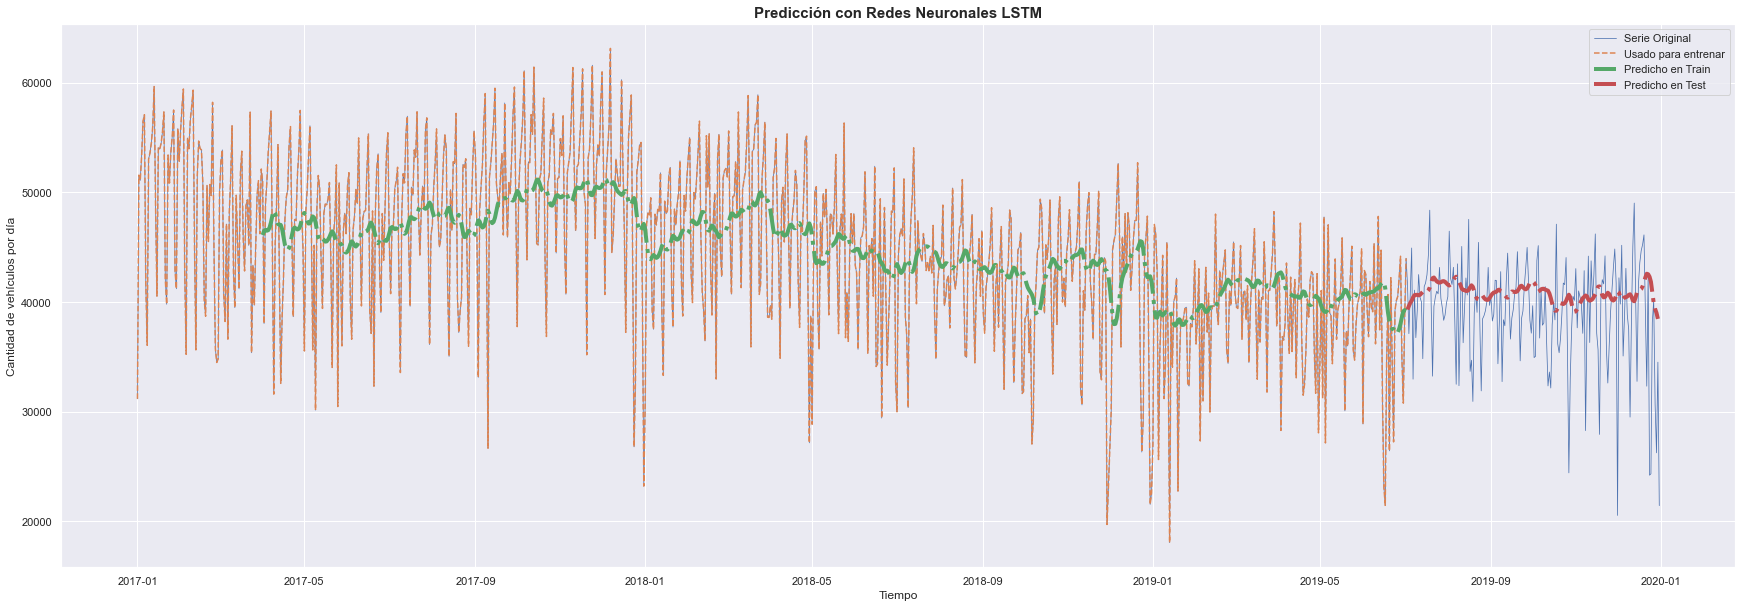

In [100]:
plt.figure(figsize=(30,10))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred_real,'-.',lw = 4, label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total-1], y_test_pred_real,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por día')
plt.title("Predicción con Redes Neuronales LSTM", fontsize=15, fontweight='bold', fontstretch='normal')
plt.show()

## 5 Conclusiones

Siendo la redes neuronales un modelo no desarrollado en profundidad, se decidió invesstigar acerca de su aplicación en redes neuronales. Así se llegó a compreder el concepto de redes neuoranles recurrentes, los cuales sirven para trabajar con datos secuenciales que en general dependen del tiempo. Se ecnontraron muchos tipos de redes neuronales, siendo el más práctico de utilizar la red Long Shorr Term Memory. Comprender el mundo interno de esta red hizo que la aplicación del concepto de redes neuronales lleve mucho tiempo. Una dficultad fue entender el input de la red, ya que los datos de entrada deben seguir una forma particular para que la red trabaje adecuamente.

Desde mi punto de vista, la redes neuronales aplicada a series de tiempo implica conocer mucho más sobre concepto de deep learning que tuve que ir investigando. Por lo cual, este proyecto apuntó a realizar un modelo sencillo fácil de aplicar.

Entre las cosas que quedan pendientes a desarrollar está la manera en que la red prediga datos futuros más allá del marco temporal del dataset y hacer la comparación el modelo SARIMAX planteado en el proyecto 03. Además, se podría optimizar el modelo desarrollado en este proyecto conociendo más en profundidad los hiperparámetros de la rede neuronales y probar aplicando un GridSearch o RandomShearch.

En conclusión, el modelo LSTM simple de redes neuronales aplicado en la serie de tiempo del flujo vehicular en la autopista Illia en efectivo fue satisfactorio y mejor que el modelo RandomForest Regressor optimizado con Radom Search.